# Figure S05: Susceptibility-associated intervals for all 26 toxicant

exposures

In [ ]:

library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'data.table'

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

In [ ]:
# source functions
source("bin/outs.R")



Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows


Attaching package: 'flextable'

The following objects are masked from 'package:kableExtra':

    as_image, footnote

The following object is masked from 'package:purrr':

    compose

here() starts at /Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript

$strain_table
$strain_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.html"

$strain_table$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.tsv.zip"

$strain_table$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.docx"

$strain_table$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S1/table_S1.csv"


$tox_table_ft
$tox_table_ft$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.html"

$tox_table_ft$tsv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.tsv.zip"

$tox_table_ft$docx
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.docx"

$tox_table_ft$csv
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S2/table_S2.csv"


$trait_table
$trait_table$html
[1] "/Users/ryanmckeown/Desktop/ToxinGWAS_Manuscript/tables/table_S3/table_S3.html"

$trait_table$tsv
[1] "

# Overview

Code to plot the intervals detected by Inbred GWA for all 26 conditions, including conditions where no significant intervals were detected.

# Inputs

In [ ]:

# Path to neamscan output directory
ns_dir <- "data/processed/20231116_Analysis_NemaScan"

# toxicant condition metadata
tox_meta_fn <- "data/processed/tox_data/tox_metadata.csv"
chr_lens_fn <- "data/raw/c_elegans_chr_lengths.tsv"


# Main

## Load data

In [ ]:
chr_lens <- data.table::fread(chr_lens_fn) %>%
  dplyr::select(CHROM, startPOS = start, endPOS = stop)

tox_meta <- data.table::fread(tox_meta_fn) %>%
  dplyr::mutate(nice_drug_label2 = stringr::str_replace(nice_drug_label2, pattern = "uM", replacement = "µM"))


qtl_raw <- data.table::fread(
  glue::glue("{ns_dir}/INBRED/Mapping/Processed/QTL_peaks_inbred.tsv")
)


# Create dataframe for plotting

Join the QTL data with the toxicant metadata to get nice labels for plotting after formatting

In [ ]:
qtl_clean <- qtl_raw %>%
  # remove any CV_length traits
  dplyr::filter(!stringr::str_detect(trait, pattern = "CV_length")) %>%
  dplyr::rename(POS = peakPOS) %>%
  # Collapse to just distinct rows
  dplyr::distinct()

plot_data <- tox_meta %>%
  dplyr::select(trait, big_class, nice_drug_label2) %>%
  dplyr::left_join(., qtl_clean, by = "trait") %>%
  # Arrange to match the factor ordering you want
  dplyr::arrange(
    desc(big_class),
    desc(nice_drug_label2)
  ) %>%
  dplyr::mutate(
    nice_drug_label2 = factor(
      nice_drug_label2,
      levels = unique(nice_drug_label2)
    )
  ) %>%
  # adjust FR name so it is broken onto two lines in the plot
  dplyr::mutate(big_class = case_when(
    big_class == "Flame Retardant" ~ "Flame\nRetardant",
    TRUE ~ big_class
  ))

head(plot_data)


                       trait big_class nice_drug_label2  CHROM      marker
                      <char>    <char>           <fctr> <char>      <char>
1:    length_Zinc_dichloride     Metal             Zinc      I   I:4884561
2: length_Silver_nitrate_7_8     Metal    Silver 7.8 µM      I   I:1622740
3: length_Silver_nitrate_7_8     Metal    Silver 7.8 µM     II  II:3016298
4: length_Silver_nitrate_7_8     Metal    Silver 7.8 µM     II II:11883855
5: length_Silver_nitrate_250     Metal    Silver 250 µM   <NA>        <NA>
6:  length_Nickel_dichloride     Metal           Nickel     II II:12203935
     log10p startPOS      POS   endPOS peak_id  narrow_h2
      <num>    <int>    <int>    <int>   <int>      <num>
1: 5.876312  3619760  4884561  8718857       1 0.08074976
2: 4.741624  1336302  1622740  1887214       1 0.07080041
3: 4.694457  2622088  3016298  3571413       2 0.07080041
4: 4.804327 11688376 11883855 12058655       3 0.07080041
5:       NA       NA       NA       NA      NA      

# Create accessory data frames for plot formatting

In [ ]:
# Create chr_lens2 with ALL toxicant levels
chr_lens2 <- chr_lens %>%
  tidyr::pivot_longer(cols = -CHROM, names_to = "poop", values_to = "POS") %>%
  dplyr::select(-poop) %>%
  # create a row for every combination to ensure y-axis levels are represented
  tidyr::crossing(
    .,
    plot_data %>%
      dplyr::distinct(nice_drug_label2, big_class, trait)
  )

class.pal.df <- tibble::tibble(
  col = c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#D55E00"),
  big_class = c("Control", "Flame\nRetardant", "Fungicide", "Herbicide", "Insecticide", "Metal")
)

# class colors for y
man_pal <- plot_data %>%
  dplyr::distinct(big_class) %>%
  dplyr::left_join(class.pal.df) %>%
  dplyr::pull(col)


Joining with `by = join_by(big_class)`

# Create plot

In [ ]:
# Create plot
all_tox_intervals_p <- ggplot() +
  theme_bw() +
  geom_point(
    data = plot_data %>% dplyr::filter(!is.na(POS)), # Filter NAs here
    mapping = aes(
      x = POS / 1000000,
      y = nice_drug_label2,
      fill = log10p
    ),
    size = 4,
    stroke = 0.5,
    shape = 24
  ) +
  ggplot2::geom_segment(
    data = plot_data %>% dplyr::filter(!is.na(startPOS)), # Filter NAs here
    mapping = ggplot2::aes(
      x = startPOS / 1e6,
      xend = endPOS / 1e6,
      y = nice_drug_label2,
      yend = nice_drug_label2
    ),
    colour = "black",
    linewidth = 1.5
  ) +
  geom_point(data = chr_lens2, mapping = aes(x = POS / 1000000, y = nice_drug_label2), alpha = 0.0) +
  ggh4x::facet_grid2(
    big_class ~ CHROM,
    scales = "free",
    space = "free",
    strip = strip_y
  ) +
  theme(
    strip.text.y.right = element_text(angle = 0, family = "Helvetica", size = 9, face = "bold", lineheight = 0.9),
    strip.text.x = element_text(family = "Helvetica", size = 10, face = "bold"),
    axis.text.y = element_text(family = "Helvetica", size = 10, face = "bold"),
    axis.title.y = element_blank(),
    axis.title.x = element_text(family = "Helvetica", size = 10, face = "bold"),
    axis.text = element_text(family = "Helvetica", size = 10),
    legend.text = element_text(family = "Helvetica", size = 10),
    legend.title = element_text(family = "Helvetica", size = 10, face = "bold"),
    legend.position = "bottom",
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    strip.background.x = ggplot2::element_rect(
      color = "black", fill = "white", linewidth = 0.5, linetype = "solid"
    ),
    plot.margin = unit(c(7.5, 7.5, 0, 7.5), "pt")
  ) +
  scale_fill_gradient(
    low = "lightblue", high = "darkred",
    name = expression(-log[10](italic(p)))
  ) +
  labs(
    x = "Genomic position (Mb)"
  )


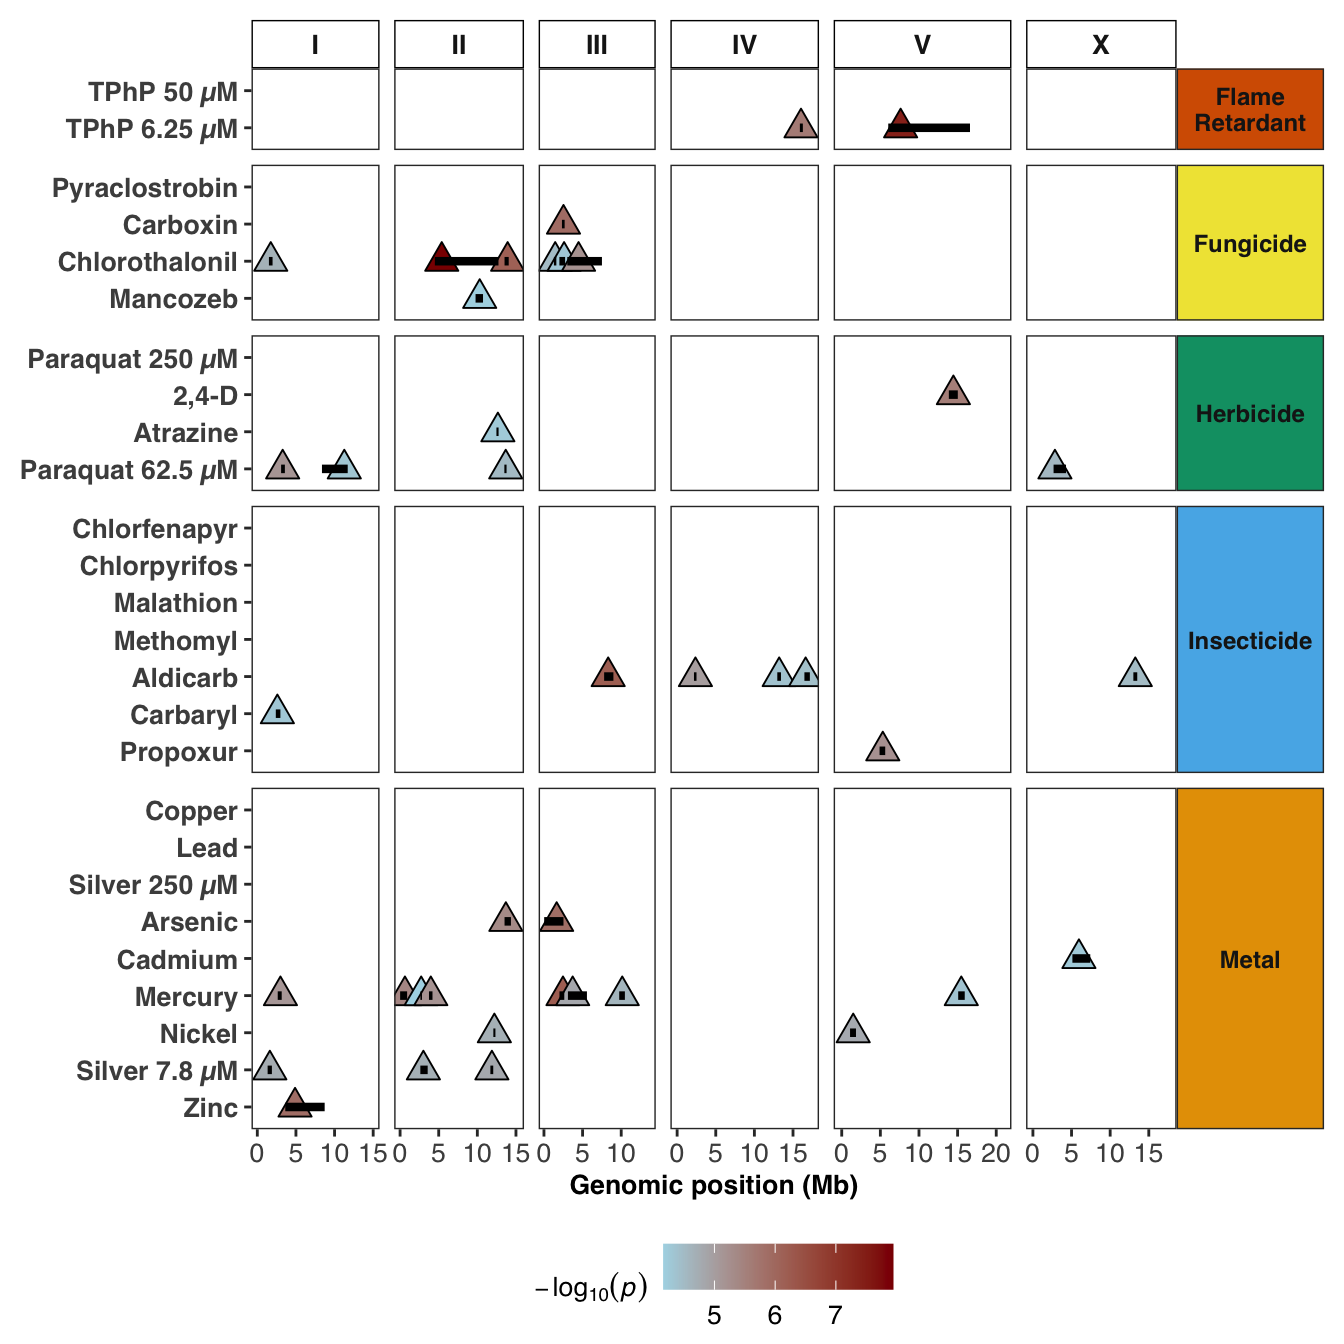

In [ ]:
all_tox_intervals_p


In [ ]:
save_plot(
  all_tox_intervals_p,
  sup_figure_fns$all_tox_intervals,
  w_in = 7.5,
  h_in = 7
)
